#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Continent x Age Group

In [6]:
df_continent_age = df[['Continent', 'Age Group']]

In [7]:
continent_agegroup_count = pd.crosstab(df_continent_age['Continent'], df_continent_age['Age Group'])
continent_agegroup_count

Age Group,18–21,22–25,26–29,30–33,34–37,38–41,42–45,46–49,50–53,54–57,58–61,62–65,66–69,70–84
Continent,,,,,,,,,,,,,,
Africa,3,11,21,22,14,8,16,15,10,8,6,7,0,0
Asia,2,19,44,88,140,151,241,263,252,202,157,97,69,47
Europe,9,46,155,280,400,573,704,738,635,454,275,121,69,40
North America,937,4369,6861,6701,7626,8509,8648,8644,7211,5360,3634,1851,865,485
Oceania,0,7,19,39,63,68,99,84,62,60,25,20,5,3
South America,1,9,28,58,136,148,167,156,112,70,43,25,10,8


### visualization

In [9]:
continent_agegroup_count = continent_agegroup_count.replace(0, np.nan)

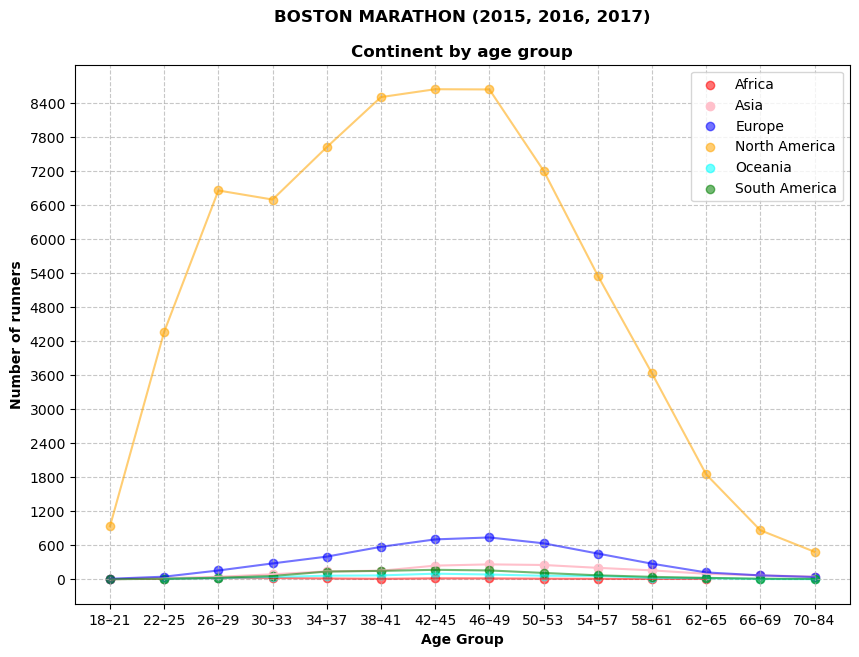

In [10]:
plt.figure(figsize=(10,7))
x = continent_agegroup_count
colors = ['red', 'pink', 'blue', 'orange', 'cyan', 'green']

idx = 0
for i in x.index:
    plt.scatter(x.columns, x.loc[i], label=i, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55)
    idx += 1
    
idx = 0
for i in x.index:
    plt.plot(x.columns, x.loc[i], color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55)
    idx += 1

plt.legend()
# plt.xticks(np.arange(20,86,5))
plt.yticks(np.arange(0,8401,600))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age group', fontweight='bold')

plt.savefig("../vexport/continentxagegroup.png", dpi=300, bbox_inches='tight')
plt.show()

### visualization without North America

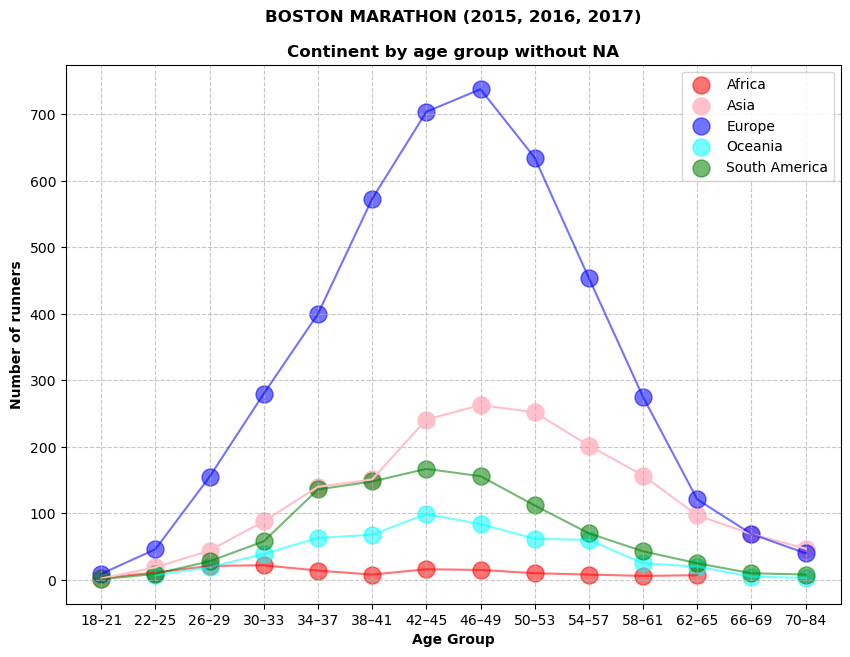

In [12]:
plt.figure(figsize=(10,7))
x = continent_agegroup_count.drop('North America')
colors = ['red', 'pink', 'blue', 'cyan', 'green']

idx = 0
for i in x.index:
    plt.scatter(x.columns, x.loc[i], label=i, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55, s=150)
    idx += 1
idx = 0
for i in x.index:
    plt.plot(x.columns, x.loc[i], color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55)
    idx += 1

plt.legend()
# plt.xticks(np.arange(20,86,5))
# plt.yticks(np.arange(0,201,15))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age group without NA', fontweight='bold')

plt.savefig("../vexport/continentxagegroup_noNA.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [14]:
continent_agegroup_count.to_csv('../export/continentxage_count.csv')